## Extra Credit: Building regularized models for Boston data set
Perform a bias variance analysis of the Boston housing data set with the thirteen predictors, following the steps on the simple data set above. Use sklearn's  built-in functions to split the data into training, validation and test sets. What is the lowest achievable error on the test set with $\lambda = 0$? Select the best value for $\lambda$ and report the test set error with the best $\lambda$. Use the technique of adding features to extend each column of the Boston data set with powers of the values in the column. Repeat the bias-variance analysis with quadratic and cubic features. What is the test set error with quadratic features with the best $\lambda$ chosen with the validation set? What is the test set error with cubic features with the best $\lambda$ chosen with the validation set? Put your analysis code in a separate Python script or notebook called bostonexpt.py or bostonexpt.ipynb. Present your results analytically with plots to support your findings. Discuss the impact of regularization for building good models for the Boston housing data set.

### Use sklearn's built-in functions to split the data into training, validation and test sets.

In [127]:
from sklearn.datasets import load_boston
from sklearn.model_selection import train_test_split
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import utils
import plot_utils

# This is a bit of magic to make matplotlib figures appear inline in the notebook
# rather than in a new window.

%matplotlib inline
plt.rcParams['figure.figsize'] = (10.0, 8.0) # set default size of plots
plt.rcParams['image.interpolation'] = 'nearest'
plt.rcParams['image.cmap'] = 'gray'

# Some more magic so that the notebook will reload external python modules;
# see http://stackoverflow.com/questions/1907993/autoreload-of-modules-in-ipython

%load_ext autoreload
%autoreload 2

########################################################################
## =========== Part 1: Loading and Visualizing Data ===================#
########################################################################
# Load Training Data
print 'Reading data ...'
bdata = load_boston()
df = pd.DataFrame(data = bdata.data, columns = bdata.feature_names)
# print df

# Split data into train, validation, test
X_train, Xtest, y_train, ytest = train_test_split(bdata.data, bdata.target, test_size=0.2, random_state=1)
X, Xval, y, yval = train_test_split(X_train, y_train, test_size=0.2, random_state=1)

X, mu, sigma = utils.feature_normalize(X)
Xval = (Xval - mu) / sigma
Xtest = (Xtest - mu) / sigma
print X.shape, y.shape, Xval.shape, yval.shape, Xtest.shape, ytest.shape


The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload
Reading data ...
(323, 13) (323,) (81, 13) (81,) (102, 13) (102,)


### What is the lowest achievable error on the test set with $\lambda$=0

In [128]:
# append a column of ones to matrix X
XX = np.vstack([np.ones((X.shape[0],)),X.T]).T
XXval = np.vstack([np.ones((Xval.shape[0],)),Xval.T]).T
XXtest = np.vstack([np.ones((Xtest.shape[0],)),Xtest.T]).T
print XX.shape, XXval.shape, XXtest.shape

reg = 0.0
reglinear_reg1 = RegularizedLinearReg_SquaredLoss()
theta_opt1 = reglinear_reg1.train(XX,y,reg=reg,num_iters=10000)
print 'Theta at lambda = ', reg, 'is ', theta_opt1
error_test = reglinear_reg1.loss(theta_opt1, XXtest, ytest, 0.0) 
print "testing error: ", error_test, "@ reg=", reg

(323, 14) (81, 14) (102, 14)
Optimization terminated successfully.
         Current function value: 11.164041
         Iterations: 27
         Function evaluations: 28
         Gradient evaluations: 28
Theta at lambda =  0.0 is  [ 22.67461053  -1.15775818   1.631485     0.38409565   0.64352493
  -2.77657469   1.53003752   0.45695607  -3.31721247   2.76593481
  -1.70772323  -2.29346349   0.54698335  -4.44749971]
testing error:  12.9277930676 @ reg= 0.0


### Select the best value for  $\lambda$  and report the test set error with the best  $\lambda$

Optimization terminated successfully.
         Current function value: 11.164041
         Iterations: 27
         Function evaluations: 28
         Gradient evaluations: 28
Optimization terminated successfully.
         Current function value: 11.164137
         Iterations: 27
         Function evaluations: 28
         Gradient evaluations: 28
Optimization terminated successfully.
         Current function value: 11.164328
         Iterations: 27
         Function evaluations: 28
         Gradient evaluations: 28
Optimization terminated successfully.
         Current function value: 11.164997
         Iterations: 27
         Function evaluations: 28
         Gradient evaluations: 28
Optimization terminated successfully.
         Current function value: 11.166906
         Iterations: 27
         Function evaluations: 28
         Gradient evaluations: 28
Optimization terminated successfully.
         Current function value: 11.173579
         Iterations: 27
         Function evaluations:

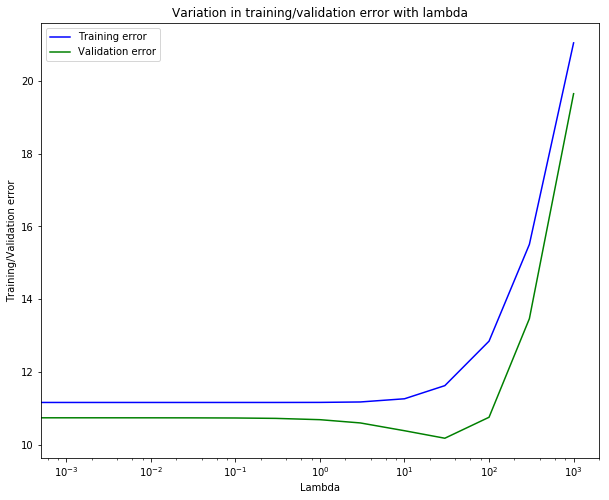

In [131]:
reg_vec, error_train, error_val = utils.validation_curve(XX,y,XXval,yval)
plot_utils.plot_lambda_selection(reg_vec, error_train, error_val)
plt.savefig('ex_fig.pdf',format='pdf')

reg_min = 30.0
reglinear_reg2 = RegularizedLinearReg_SquaredLoss()
theta_opt2 = reglinear_reg2.train(XX,y,reg=reg_min,num_iters=10000)
print 'Theta at lambda =', reg_min, ' is ', theta_opt2
error_test = reglinear_reg2.loss(theta_opt2, XXtest, ytest, 0.0) 
print "testing error: ", error_test, "@ reg=", reg_min

### Use the technique of adding features to extend each column of the Boston data set with powers of the values in the column. Repeat the bias-variance analysis with quadratic and cubic features. 

### What is the test set error with quadratic features with the best $\lambda$ chosen with the validation set?

Optimization terminated successfully.
         Current function value: 2.859692
         Iterations: 469
         Function evaluations: 476
         Gradient evaluations: 476
Optimization terminated successfully.
         Current function value: 2.862305
         Iterations: 469
         Function evaluations: 476
         Gradient evaluations: 476
Optimization terminated successfully.
         Current function value: 2.865823
         Iterations: 467
         Function evaluations: 474
         Gradient evaluations: 474
Optimization terminated successfully.
         Current function value: 2.874030
         Iterations: 463
         Function evaluations: 470
         Gradient evaluations: 470
Optimization terminated successfully.
         Current function value: 2.890836
         Iterations: 404
         Function evaluations: 411
         Gradient evaluations: 411
Optimization terminated successfully.
         Current function value: 2.931741
         Iterations: 290
         Function ev

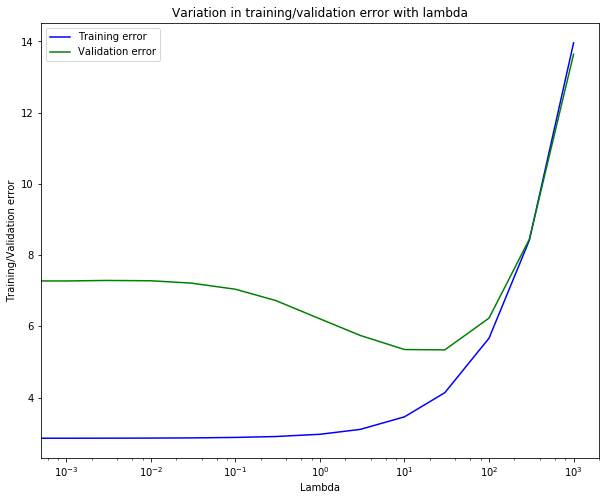

In [130]:
p=2
poly = sklearn.preprocessing.PolynomialFeatures(degree=p,include_bias=False)
X_poly = poly.fit_transform(X)
X_poly_val = poly.fit_transform(Xval)
X_poly_test = poly.fit_transform(Xtest)

X_poly, mu, sigma = utils.feature_normalize(X_poly)
X_poly_val = (X_poly_val - mu) / sigma
X_poly_test = (X_poly_test - mu) / sigma

XX_poly = np.vstack([np.ones((X_poly.shape[0],)),X_poly.T]).T
XX_poly_val = np.vstack([np.ones((X_poly_val.shape[0],)),X_poly_val.T]).T
XX_poly_test = np.vstack([np.ones((X_poly_test.shape[0],)),X_poly_test.T]).T

reg_vec, error_train, error_val = utils.validation_curve(XX_poly,y,XX_poly_val,yval)
plot_utils.plot_lambda_selection(reg_vec, error_train, error_val)
plt.savefig('ex_fig_p2.pdf',format='pdf')

reg_min = 30.0
reglinear_reg3 = RegularizedLinearReg_SquaredLoss()
theta_opt3 = reglinear_reg3.train(XX_poly,y,reg=reg_min,num_iters=1000)
print 'Theta at lambda =', reg_min, ' is ', theta_opt3
error_test = reglinear_reg3.loss(theta_opt3, XX_poly_test, ytest, 0.0) 
print "testing error: ", error_test, "@ reg=", reg_min

### What is the test set error with cubic features with the best $\lambda$ chosen with the validation set?

Optimization terminated successfully.
         Current function value: 0.000347
         Iterations: 1839
         Function evaluations: 1845
         Gradient evaluations: 1845
Optimization terminated successfully.
         Current function value: 0.056098
         Iterations: 1301
         Function evaluations: 1307
         Gradient evaluations: 1307
Optimization terminated successfully.
         Current function value: 0.102281
         Iterations: 1054
         Function evaluations: 1060
         Gradient evaluations: 1060
Optimization terminated successfully.
         Current function value: 0.175201
         Iterations: 786
         Function evaluations: 792
         Gradient evaluations: 792
Optimization terminated successfully.
         Current function value: 0.272893
         Iterations: 564
         Function evaluations: 570
         Gradient evaluations: 570
Optimization terminated successfully.
         Current function value: 0.443468
         Iterations: 381
         Fu

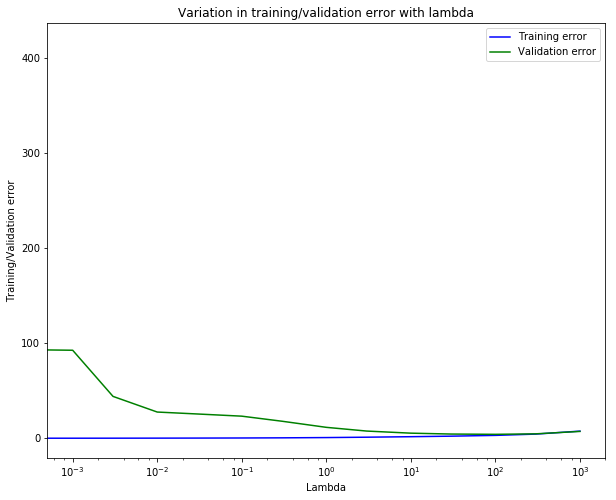

In [133]:
p=3
poly = sklearn.preprocessing.PolynomialFeatures(degree=p,include_bias=False)
X_poly = poly.fit_transform(X)
X_poly_val = poly.fit_transform(Xval)
X_poly_test = poly.fit_transform(Xtest)

X_poly, mu, sigma = utils.feature_normalize(X_poly)
X_poly_val = (X_poly_val - mu) / sigma
X_poly_test = (X_poly_test - mu) / sigma

XX_poly = np.vstack([np.ones((X_poly.shape[0],)),X_poly.T]).T
XX_poly_val = np.vstack([np.ones((X_poly_val.shape[0],)),X_poly_val.T]).T
XX_poly_test = np.vstack([np.ones((X_poly_test.shape[0],)),X_poly_test.T]).T

reg_vec, error_train, error_val = utils.validation_curve(XX_poly,y,XX_poly_val,yval)
plot_utils.plot_lambda_selection(reg_vec, error_train, error_val)
print error_val
plt.savefig('ex_fig_p3.pdf',format='pdf')


reg_min = 100.0
reglinear_reg4 = RegularizedLinearReg_SquaredLoss()
theta_opt4 = reglinear_reg4.train(XX_poly,y,reg=reg_min,num_iters=10000)
print 'Theta at lambda =', reg_min, ' is ', theta_opt4
error_test = reglinear_reg4.loss(theta_opt4, XX_poly_test, ytest, 0.0) 
print "testing error: ", error_test, "@ reg=", reg_min